In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('ggplot')
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('/Users/willfitzhugh/Desktop/Coding/Supply-Chain-Analysis/Data/Model/DeliveryData_1.0.csv')
data.head(2)

,RealShippingDays,ScheduledShippingDays,Order Item Quantity,Product Price,OrderAfterNoon,PaymentType_CASH,PaymentType_DEBIT,PaymentType_PAYMENT,PaymentType_TRANSFER,Customer Segment_Consumer,...,ProductDepartment_Technology,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,5,2,2,59.990002,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,2,2,39.990002,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [3]:
#train test split
X = data.drop(columns=['RealShippingDays','ScheduledShippingDays'])
y = data.RealShippingDays

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

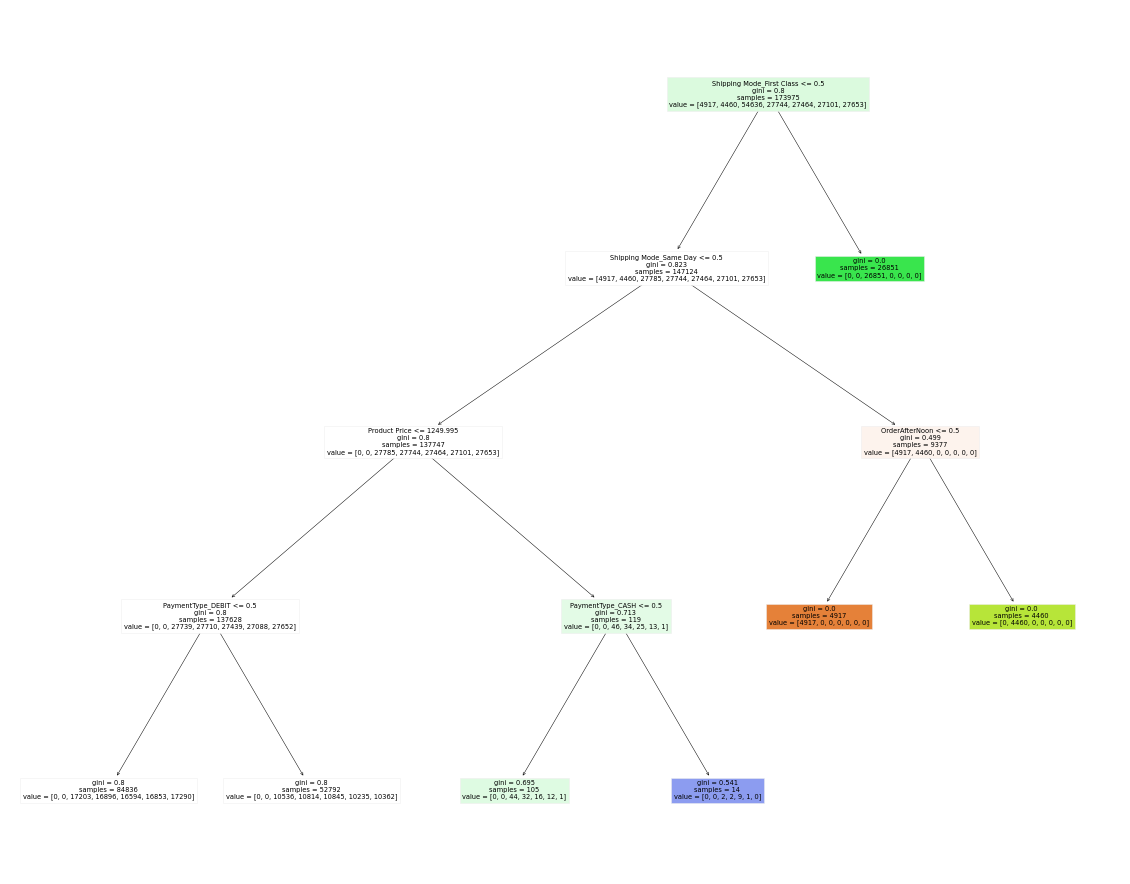

In [4]:
tree = DecisionTreeClassifier(max_depth = 4).fit( X, y )

## Visualizing the decision tree model and identify any interesting interactions/features
fig = plt.figure(figsize = (20, 16))
plot_tree(tree, feature_names = X.columns, filled = True);

---
# Random Forest Model

In [10]:
RFC = RandomForestClassifier()

#grid search
grid_values = {
    'criterion':['gini', 'log_loss'],
    'n_estimators':[100, 300, 400]
}
RFC_gridsearch = GridSearchCV(RFC, param_grid = grid_values, scoring = 'accuracy', cv=5)
RFC_gridsearch.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'n_estimators': [100, 300, 400]},
             scoring='accuracy')

In [11]:
#grid search CV results
pd.DataFrame(RFC_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,19.153273,0.206530,1.536193,0.032665,gini,300,"{'criterion': 'gini', 'n_estimators': 300}",0.372131,0.375293,0.370874,0.378100,0.380933,0.375466,0.003717,1
4,20.408818,0.584459,1.568008,0.145916,log_loss,300,"{'criterion': 'log_loss', 'n_estimators': 300}",0.372747,0.374348,0.371284,0.376416,0.379332,0.374826,0.002826,2
3,8.063339,0.340502,0.564651,0.031682,log_loss,100,"{'criterion': 'log_loss', 'n_estimators': 100}",0.372008,0.376401,0.370011,0.377484,0.377402,0.374661,0.003071,3
2,27.478387,1.495657,2.205191,0.115688,gini,400,"{'criterion': 'gini', 'n_estimators': 400}",0.371187,0.375416,0.369806,0.376745,0.379332,0.374497,0.003528,4
5,26.665585,0.136122,2.011030,0.029318,log_loss,400,"{'criterion': 'log_loss', 'n_estimators': 400}",0.371639,0.376688,0.370545,0.376786,0.376663,0.374464,0.002775,5


In [100]:
RFC = RandomForestClassifier(n_estimators=100, criterion='log_loss')
RFC.fit(X_train, y_train)
RFC.score(X_train, y_train)

0.551789262781035

In [101]:
RFC.score(X_test, y_test)

0.3767938229264461

In [188]:
RFC_pred = RFC.predict(X_test)
np.mean(np.abs(RFC_pred - y_test))

1.2536547046538808

- though the accuracy is much improved from the original ScheduledShipDays, the avg days off schedule has not improved much

In [45]:
Counter(RFC_pred)

Counter({6: 8614, 5: 7655, 2: 16502, 3: 7974, 4: 8600, 0: 1521, 1: 1327})

In [46]:
Counter(y_test)

Counter({4: 8299, 3: 8333, 2: 16196, 6: 8345, 5: 8172, 0: 1521, 1: 1327})

---
# Linear Regression Model

In [48]:
LR= LinearRegression()

In [115]:
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.3907480978902088

In [116]:
print("R^2 test score")
LR.score(X_test,y_test)

R^2 test score


0.3959774280046593

In [117]:
print("Avg days off schedule")
LR_pred = np.round(LR.predict(X_test))
np.mean(np.abs(LR_pred - y_test))

Avg days off schedule


0.9579637116088364

In [118]:
print("Accuracy")
(LR_pred == y_test).mean()

Accuracy


0.35924357672484813

In [120]:
Counter(np.round(LR_pred))

Counter({4.0: 41360, 2.0: 7985, 0.0: 1903, 1.0: 945})

- The lin reg model reduced avg days of schedule per order significantly, but accuracy was slightly lower than the random forrest model. Ensemble model might be the move

---
# Logistic Regression model

In [4]:
LReg = LogisticRegression()

#grid search
grid_values = {
    'penalty':['l1', 'l2'],
    'solver':['saga'],
    'tol':[0.01],
    'C':[1,2,10]
}
LReg_gridsearch = GridSearchCV(LReg, param_grid = grid_values, scoring = 'accuracy', cv=5)
LReg_gridsearch.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['saga'], 'tol': [0.01]},
             scoring='accuracy')

In [5]:
#grid search CV results
pd.DataFrame(LReg_gridsearch.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.916140,0.573059,0.006026,0.002126,1,l1,saga,0.01,"{'C': 1, 'penalty': 'l1', 'solver': 'saga', 't...",0.315638,0.315638,0.315651,0.315651,0.315651,0.315646,0.000006,1
1,10.649233,0.114874,0.005426,0.000156,1,l2,saga,0.01,"{'C': 1, 'penalty': 'l2', 'solver': 'saga', 't...",0.315638,0.315638,0.315651,0.315651,0.315651,0.315646,0.000006,1
2,12.728668,0.337288,0.005048,0.000327,2,l1,saga,0.01,"{'C': 2, 'penalty': 'l1', 'solver': 'saga', 't...",0.315638,0.315638,0.315651,0.315651,0.315651,0.315646,0.000006,1
3,10.574379,0.031048,0.005346,0.000117,2,l2,saga,0.01,"{'C': 2, 'penalty': 'l2', 'solver': 'saga', 't...",0.315638,0.315638,0.315651,0.315651,0.315651,0.315646,0.000006,1
4,14.589284,1.076175,0.005514,0.000516,10,l1,saga,0.01,"{'C': 10, 'penalty': 'l1', 'solver': 'saga', '...",0.315638,0.315638,0.315651,0.315651,0.315651,0.315646,0.000006,1
5,11.467141,0.981380,0.005716,0.000550,10,l2,saga,0.01,"{'C': 10, 'penalty': 'l2', 'solver': 'saga', '...",0.315638,0.315638,0.315651,0.315651,0.315651,0.315646,0.000006,1


In [54]:
LReg = LogisticRegression( penalty='l1', solver='saga', tol=.01, C=1 )
LReg.fit(X_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='saga', tol=0.01)

In [55]:
LReg.score(X_train,y_train)

0.3156459903762461

In [57]:
print('test accuracy score')
LReg.score(X_test,y_test)

test accuracy score


0.31030981166056754

In [58]:
print("Avg days off schedule")
LReg_pred = np.round(LReg.predict(X_test))
np.mean(np.abs(LReg_pred - y_test))

Avg days off schedule


1.6706454888586593

- bad results treating this like a classification problem

---
# Ridge Regression Model

In [19]:
ridge=Ridge()

#grid search
grid_values = {
    'tol':[.5, .1, 1e-3],
    'alpha':[1,10, 30, 50]
}
ridge_gridsearch = GridSearchCV(ridge, param_grid = grid_values, cv=5)
ridge_gridsearch.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 30, 50], 'tol': [0.5, 0.1, 0.001]})

In [20]:
#grid search CV results
pd.DataFrame(ridge_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.045168,0.000081,0.004446,0.000019,30,0.5,"{'alpha': 30, 'tol': 0.5}",0.392349,0.385600,0.386062,0.395624,0.392537,0.390434,0.003937,1
7,0.045026,0.000139,0.004443,0.000013,30,0.1,"{'alpha': 30, 'tol': 0.1}",0.392349,0.385600,0.386062,0.395624,0.392537,0.390434,0.003937,1
8,0.045098,0.000023,0.004454,0.000027,30,0.001,"{'alpha': 30, 'tol': 0.001}",0.392349,0.385600,0.386062,0.395624,0.392537,0.390434,0.003937,1
3,0.045851,0.000371,0.004580,0.000026,10,0.5,"{'alpha': 10, 'tol': 0.5}",0.392349,0.385601,0.386060,0.395616,0.392538,0.390433,0.003935,4
4,0.046564,0.001639,0.004587,0.000012,10,0.1,"{'alpha': 10, 'tol': 0.1}",0.392349,0.385601,0.386060,0.395616,0.392538,0.390433,0.003935,4


In [59]:
ridge = Ridge(alpha=30,tol=.1)
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.3907456401873586

In [60]:
ridge.score(X_test,y_test)

0.39597338615300426

In [142]:
print("Avg days off schedule")
ridge_pred = np.round(ridge.predict(X_test))
np.mean(np.abs(ridge_pred - y_test))

Avg days off schedule


0.9542084187534727

In [62]:
print("Accuracy")
(ridge_pred == y_test).mean()

Accuracy


0.3629988695802119

In [66]:
print(Counter(ridge_pred))
print(Counter(y_test))

Counter({4.0: 41360, 2.0: 7985, 0.0: 1705, 1.0: 1143})
Counter({2: 16196, 6: 8345, 3: 8333, 4: 8299, 5: 8172, 0: 1521, 1: 1327})


- slight improvement over the linear regression model, but distribution is off. Model over predicts 4 days and doesn't predict any deliveries taking 3,5,or 6 days. There are 16,500+ orders taking 3,5,6 days that aren't predicted.
- seems like the model is accurate for orders taking 0,1,2 days, and then just guess 4 for the rest of the orders becuase thats in the middle of the spread.

---
# Lasso Model

In [23]:
lasso=Lasso()

#grid search
grid_values = {
    'tol':[ 2, 1,.5, .1, .01],
    'alpha':[.0005, .001, .01, .1]
}
lasso_gridsearch = GridSearchCV(lasso, param_grid = grid_values, cv=5)
lasso_gridsearch.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.1],
                         'tol': [2, 1, 0.5, 0.1, 0.01]})

In [25]:
#grid search CV results
pd.DataFrame(lasso_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.058466,0.000999,0.005536,0.000109,0.001,1,"{'alpha': 0.001, 'tol': 1}",0.392458,0.385699,0.386051,0.395856,0.392540,0.390521,0.003988,1
7,0.060532,0.000798,0.005660,0.000178,0.001,0.5,"{'alpha': 0.001, 'tol': 0.5}",0.392458,0.385699,0.386051,0.395856,0.392540,0.390521,0.003988,1
8,0.064650,0.001829,0.006201,0.000311,0.001,0.1,"{'alpha': 0.001, 'tol': 0.1}",0.392436,0.385675,0.386066,0.395871,0.392541,0.390518,0.003993,3
9,0.068869,0.006180,0.006586,0.000487,0.001,0.01,"{'alpha': 0.001, 'tol': 0.01}",0.392436,0.385675,0.386066,0.395871,0.392541,0.390518,0.003993,4
4,0.073921,0.006368,0.006707,0.000366,0.0005,0.01,"{'alpha': 0.0005, 'tol': 0.01}",0.392442,0.385671,0.386080,0.395810,0.392559,0.390512,0.003976,5


In [67]:
lasso=Lasso(alpha=.001,tol=1)
lasso.fit(X_train,y_train)
lasso.score(X_train,y_train)

0.3906974480544174

In [68]:
lasso.score(X_test,y_test)

0.3960113459938237

In [140]:
print("Avg days off schedule")
lasso_pred = np.round(lasso.predict(X_test))
np.mean(np.abs(lasso_pred - y_test))

Avg days off schedule


0.9522924530109401

In [85]:
print("Accuracy")
(lasso_pred == y_test).mean()

Accuracy


0.36491483532274444

In [144]:
Counter(lasso_pred)

Counter({4.0: 41360, 2.0: 7985, 0.0: 1607, 1.0: 1241})

- further slight improvement on the ridge regression model, but again the model over predicts 4 day deliveries.

In [147]:
lasso_results = pd.DataFrame({'lasso prediction':lasso_pred,'real delivery days':y_test})
lasso_results_low = lasso_results[lasso_results['real delivery days']>2]
print('Lasso model accuracy on deliveries over 2 days')
(lasso_results_low.iloc[:,0] == lasso_results_low.iloc[:,1]).mean()

Lasso model accuracy on deliveries over 2 days


0.25035446016471086

- so the model is much better at predicting shorter delivery timesorders.

In [151]:
#exploring the distribution of prediciton accuracy for each model
results_df = lasso_results.copy()
results_df['random forest prediction'] = RFC_pred
results_df['ridge reg prediction'] = ridge_pred
results_df['lin reg prediction'] = LR_pred
results_df = results_df.astype('int64')


for i in [0,2,3,4]:
    results_df.iloc[:,i] = (results_df.iloc[:,i]==results_df.iloc[:,1])
    
results_df.groupby('real delivery days').mean()

,lasso prediction,random forest prediction,ridge reg prediction,lin reg prediction
real delivery days,,,,
0,1.000000,1.000000,0.999343,1.000000
1,0.935192,1.000000,0.860588,0.712133
2,0.493023,0.605026,0.493023,0.493023
3,0.000000,0.210008,0.000000,0.000000
4,1.000000,0.215568,1.000000,1.000000
5,0.000000,0.197014,0.000000,0.000000
6,0.000000,0.224086,0.000000,0.000000


- the regression models all predict 4 for any delivery 3 days or over, so they predict a 4 day deilvery woth 100% accuracy. A broken delivery time model is right 1 outta 4 times (on orders > 2 days).

In [168]:
results_df = lasso_results.copy()
results_df['random forest prediction'] = RFC_pred
results_df['ridge reg prediction'] = ridge_pred
results_df['lin reg prediction'] = LR_pred
results_df = results_df.astype('int64')
results_df

,lasso prediction,real delivery days,random forest prediction,ridge reg prediction,lin reg prediction
134504,4,4,6,4,4
81448,4,4,5,4,4
172238,4,3,5,4,4
100186,2,2,2,2,2
168933,2,2,2,2,2
...,...,...,...,...,...
5501,2,2,2,2,2
143549,4,3,4,4,4
81170,4,4,5,4,4
50183,4,5,2,4,4


In [170]:
rfc_results_df=results_df[['real delivery days','random forest prediction']]
rfc_results_df

,real delivery days,random forest prediction
134504,4,6
81448,4,5
172238,3,5
100186,2,2
168933,2,2
...,...,...
5501,2,2
143549,3,4
81170,4,5
50183,5,2


In [167]:
results_df['real delivery days']==results_df['random forest prediction']

134504    False
81448     False
172238    False
100186     True
168933     True
          ...  
5501       True
143549    False
81170     False
50183     False
35724     False
Length: 52193, dtype: bool

In [175]:
rfc_results_df['TF'] = (results_df['real delivery days']==results_df['random forest prediction'])
rfc_results_df.groupby('random forest prediction').mean()

,real delivery days,TF
random forest prediction,,
0,0.000000,1.000000
1,1.000000,1.000000
2,3.013391,0.593735
3,3.989366,0.216397
4,4.008096,0.213002
5,4.017413,0.210788
6,4.034989,0.214523
